In [81]:
import torchvision.transforms as transforms
import pandas as pd

dfPath = r'labeled_train_set.csv'
trainData = pd.read_csv(dfPath)
df = pd.DataFrame(trainData)
df_2 = df.iloc[:, 1:].values
#transform values to pytorch tensor
tensor_data = torch.tensor(df_2)
#make them have values between 0 to 1
normalized_tensor_data = tensor_data.float() / 255.0

print(normalized_tensor_data[0])



tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [72]:
import torch
# Make a loader to enable us to iterate with batches of 32
loader = torch.utils.data.DataLoader(dataset = normalized_tensor_data, batch_size = 32, shuffle = True)

In [45]:
# design our autoencoder

# 28*28 -> 200 ->100 -> 50 -> 20 -> 10 -> 20 -> 50 -> 100 -> 200 -> 28*28
# Takes torch neural network as super set
class AE(torch.nn.Module):
# Inherits init from torch.nn
    def __init__(self):
        super().__init__()

    # Define encoder as sequence of layers you want and their activation functions
    # We use ReLU as our activation function because it performed well in our last exercise, and 
    # It often performs well in neural networks. Additionally, due to its computational efficiency, it is a preferred choice

        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 200),
            torch.nn.ReLU(),
            torch.nn.Linear(200, 100),
            torch.nn.ReLU(),
            torch.nn.Linear(100, 50),
            torch.nn.ReLU(),
            torch.nn.Linear(50, 20),
            torch.nn.ReLU(),
            torch.nn.Linear(20, 10)
        )

    # The decoder is the reverse of the encoder, and it has the same structure. 
    # Since we normalized the data, we use a sigmoid function at the end of the decoder to predict numbers within the range of [0, 1].

        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(10, 20),
            torch.nn.ReLU(),
            torch.nn.Linear(20, 50),
            torch.nn.ReLU(),
            torch.nn.Linear(50, 100),
            torch.nn.ReLU(),
            torch.nn.Linear(100, 200),
            torch.nn.ReLU(),
            torch.nn.Linear(200, 28 * 28),
            torch.nn.Sigmoid()
        )
    # We show the series of actions taken in our Autoencoder
    # First we encode and then we decode
    # The output is our answer

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [48]:

model = AE()

# Create an optimzer. we used adams as it's so widely used in nn
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3,  weight_decay = 1e-8)

# Beacuse our data is some how continous we use MSE as loss function

loss_function = torch.nn.MSELoss()

In [58]:
epochs = 50

for epoch in range(epochs):
    loss = 0
    for batch_features in loader:
        # Reshape each batch
        batch_features = batch_features.reshape(-1, 28*28)
        
        # Reset the gradients for the new computations
        optimizer.zero_grad()
        
        # Calculate the output of our encoder
        outputs = model(batch_features)
        
        # Compute loss
        loss = loss_function(outputs, batch_features)
        
        # Perform backpropagation
        loss.backward()
        
        # Update parameters
        optimizer.step()
        

        loss += loss.item()
    
    # Compute the epoch training loss
    loss = loss / len(loader)
    
    # Print loss for 10*i th epoch
    if(epoch%10 == 9 or epoch == 0):
        
    # Display the epoch training loss
        print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))

epoch : 1/50, loss = 0.000053
epoch : 10/50, loss = 0.000050
epoch : 20/50, loss = 0.000048
epoch : 30/50, loss = 0.000058
epoch : 40/50, loss = 0.000053
epoch : 50/50, loss = 0.000060


In [ ]:
# Architectures and parameters are discussed in the report

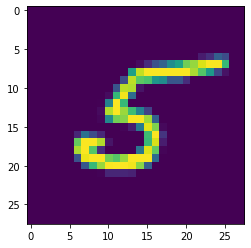

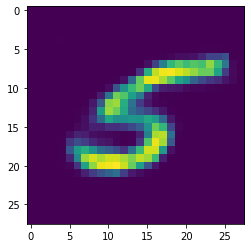

In [76]:
import matplotlib.pyplot as plt

image = next(iter(loader))
for i, item in enumerate(image):
    # Reshape the array for plotting
    item = item.reshape(-1, 28, 28)
    
    # Convert the tensor to a NumPy array
    item_np = item.detach().numpy()
    
    # Plot the image
    plt.imshow(item_np[0])
    plt.show()
    
    # Break out of the loop after plotting the first image
    break

for i, item in enumerate(model(image)):
    item = item.reshape(-1, 28, 28)
    
    # Convert the tensor to a NumPy array
    item_np = item.detach().numpy()
    
    # Plot the image
    plt.imshow(item_np[0])
    plt.show()
    break
# As you can see, after using the encoder, we obtained a significantly improved representation of the digits.
# It can be considered as a denoising process. 
# Therefore, utilizing the autoencoder before classification assists in extracting enhanced features.

In [86]:
# Now we wanna apply the encoder on our data
import numpy as np

# Encode the data
encoded_data = model.encoder(normalized_tensor_data)

# Convert to NumPy arrays
encoded_data_np = encoded_data.detach().numpy()
labels = df['label']

# Concatenate encoded data and labels
data_with_labels = np.hstack((labels.values.reshape(-1, 1), encoded_data_np))

# Create a DataFrame
column_names = ['label'] + [f'feature{i+1}' for i in range(encoded_data_np.shape[1])]
df_encoded = pd.DataFrame(data_with_labels, columns=column_names)

# Save as CSV
df_encoded.to_csv('encoded_data.csv', index=False)

# Now we have our new features in a new csv called encoded_data.csv and we will use it for classification
# The advantages will be discussed in the report

In [91]:
# PART II

# Import what's needed
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold

# Load the labeled data
df = pd.read_csv('encoded_data.csv')

# Separate the features and labels
X = df.iloc[:, 1:].values
y = df['label'].values
best_score = 0
for hidden_layer_size in [(100,), (100, 25), (80, 50, 20)]:
    for activations in ['relu', 'logistic', 'tanh', 'identity']:
        for learning_rate in ['constant','adaptive']:
            print(i)
            i = i + 1
            mlp = MLPClassifier(hidden_layer_sizes = hidden_layer_size, activation = activations, learning_rate = learning_rate, max_iter=1000)
            scores = cross_val_score(mlp, X, y, cv=5)
            average_score = scores.mean()

            if average_score > best_score:
                best_score = average_score
                best_params = {'hidden' : hidden_layer_size, 'act':activations, 'learn':learning_rate}

1
2
3


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


4


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


5
6
7
8
9
10
11


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


12


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


13
14
15
16
17
18
19


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


20


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


21
22
23
24


In [94]:
print(best_score)
print(best_params)

0.9501111111111111
{'hidden': (100,), 'act': 'relu', 'learn': 'adaptive'}


In [127]:
best_mlp = MLPClassifier(hidden_layer_sizes = (100,), activation = 'relu'
                         , learning_rate = 'adaptive'
                         , max_iter=1000)
# Now it's time to train the best model on our training set and then test in on our test set

from sklearn.metrics import accuracy_score, confusion_matrix



# we should change our test data to a 10-dimensional data using our encoder
df = pd.read_csv('test_set.csv')

# Separate the features and labels
X_test1 = df.iloc[:, 1:].values
y_test = df['label'].values


#transform values to pytorch tensor
tensor_X = torch.tensor(X_test1).float()/255.0
X_encoded_test = model.encoder(tensor_X)
X_test = X_encoded_test.detach().numpy()

best_mlp.fit(X, y)
print('Training done')

y_pred = best_mlp.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)

Training done


In [128]:
print("For Test Data")
print("Accuracy : " , accuracy)
print(confusion_mtx)

print("For Train Data")
y_pred2 = best_mlp.predict(X)
accuracy2 = accuracy_score(y, y_pred2)
confusion_mtx2 = confusion_matrix(y, y_pred2)
print("Accuracy : " , accuracy2)
print(confusion_mtx2)

For Test Data
Accuracy :  0.9311
[[ 955    0    1    0    0    7   12    0    3    2]
 [   0 1110    3    1    6    1    4    3    6    1]
 [  10    3  958   19    6    3    5    9   16    3]
 [   2    3   11  931    0   14    1    8   34    6]
 [   1    2    1    0  909    3    8    5    6   47]
 [   7    1    5   24    5  798    9    1   33    9]
 [  12    3    1    0   13   12  911    0    2    4]
 [   0    3   11   10    4    1    1  947    4   47]
 [   1    4    4   27    8   41    2    6  871   10]
 [   4    7    2    6   33    4    2   10   20  921]]
For Train Data
Accuracy :  0.9752222222222222
[[1765    0    0    3    0    4    3    0    2    0]
 [   0 2025   11    3    1    1    1    1    1    2]
 [   6    0 1775    7    3    1    0    3    7    2]
 [   1    0    8 1750    3   13    0   10   40    7]
 [   0    5    3    0 1673    1    1    3    1   28]
 [   2    0    1   15    4 1532    8    1   10    4]
 [   2    2    1    1    1    7 1751    0    4    0]
 [   0    7    4   

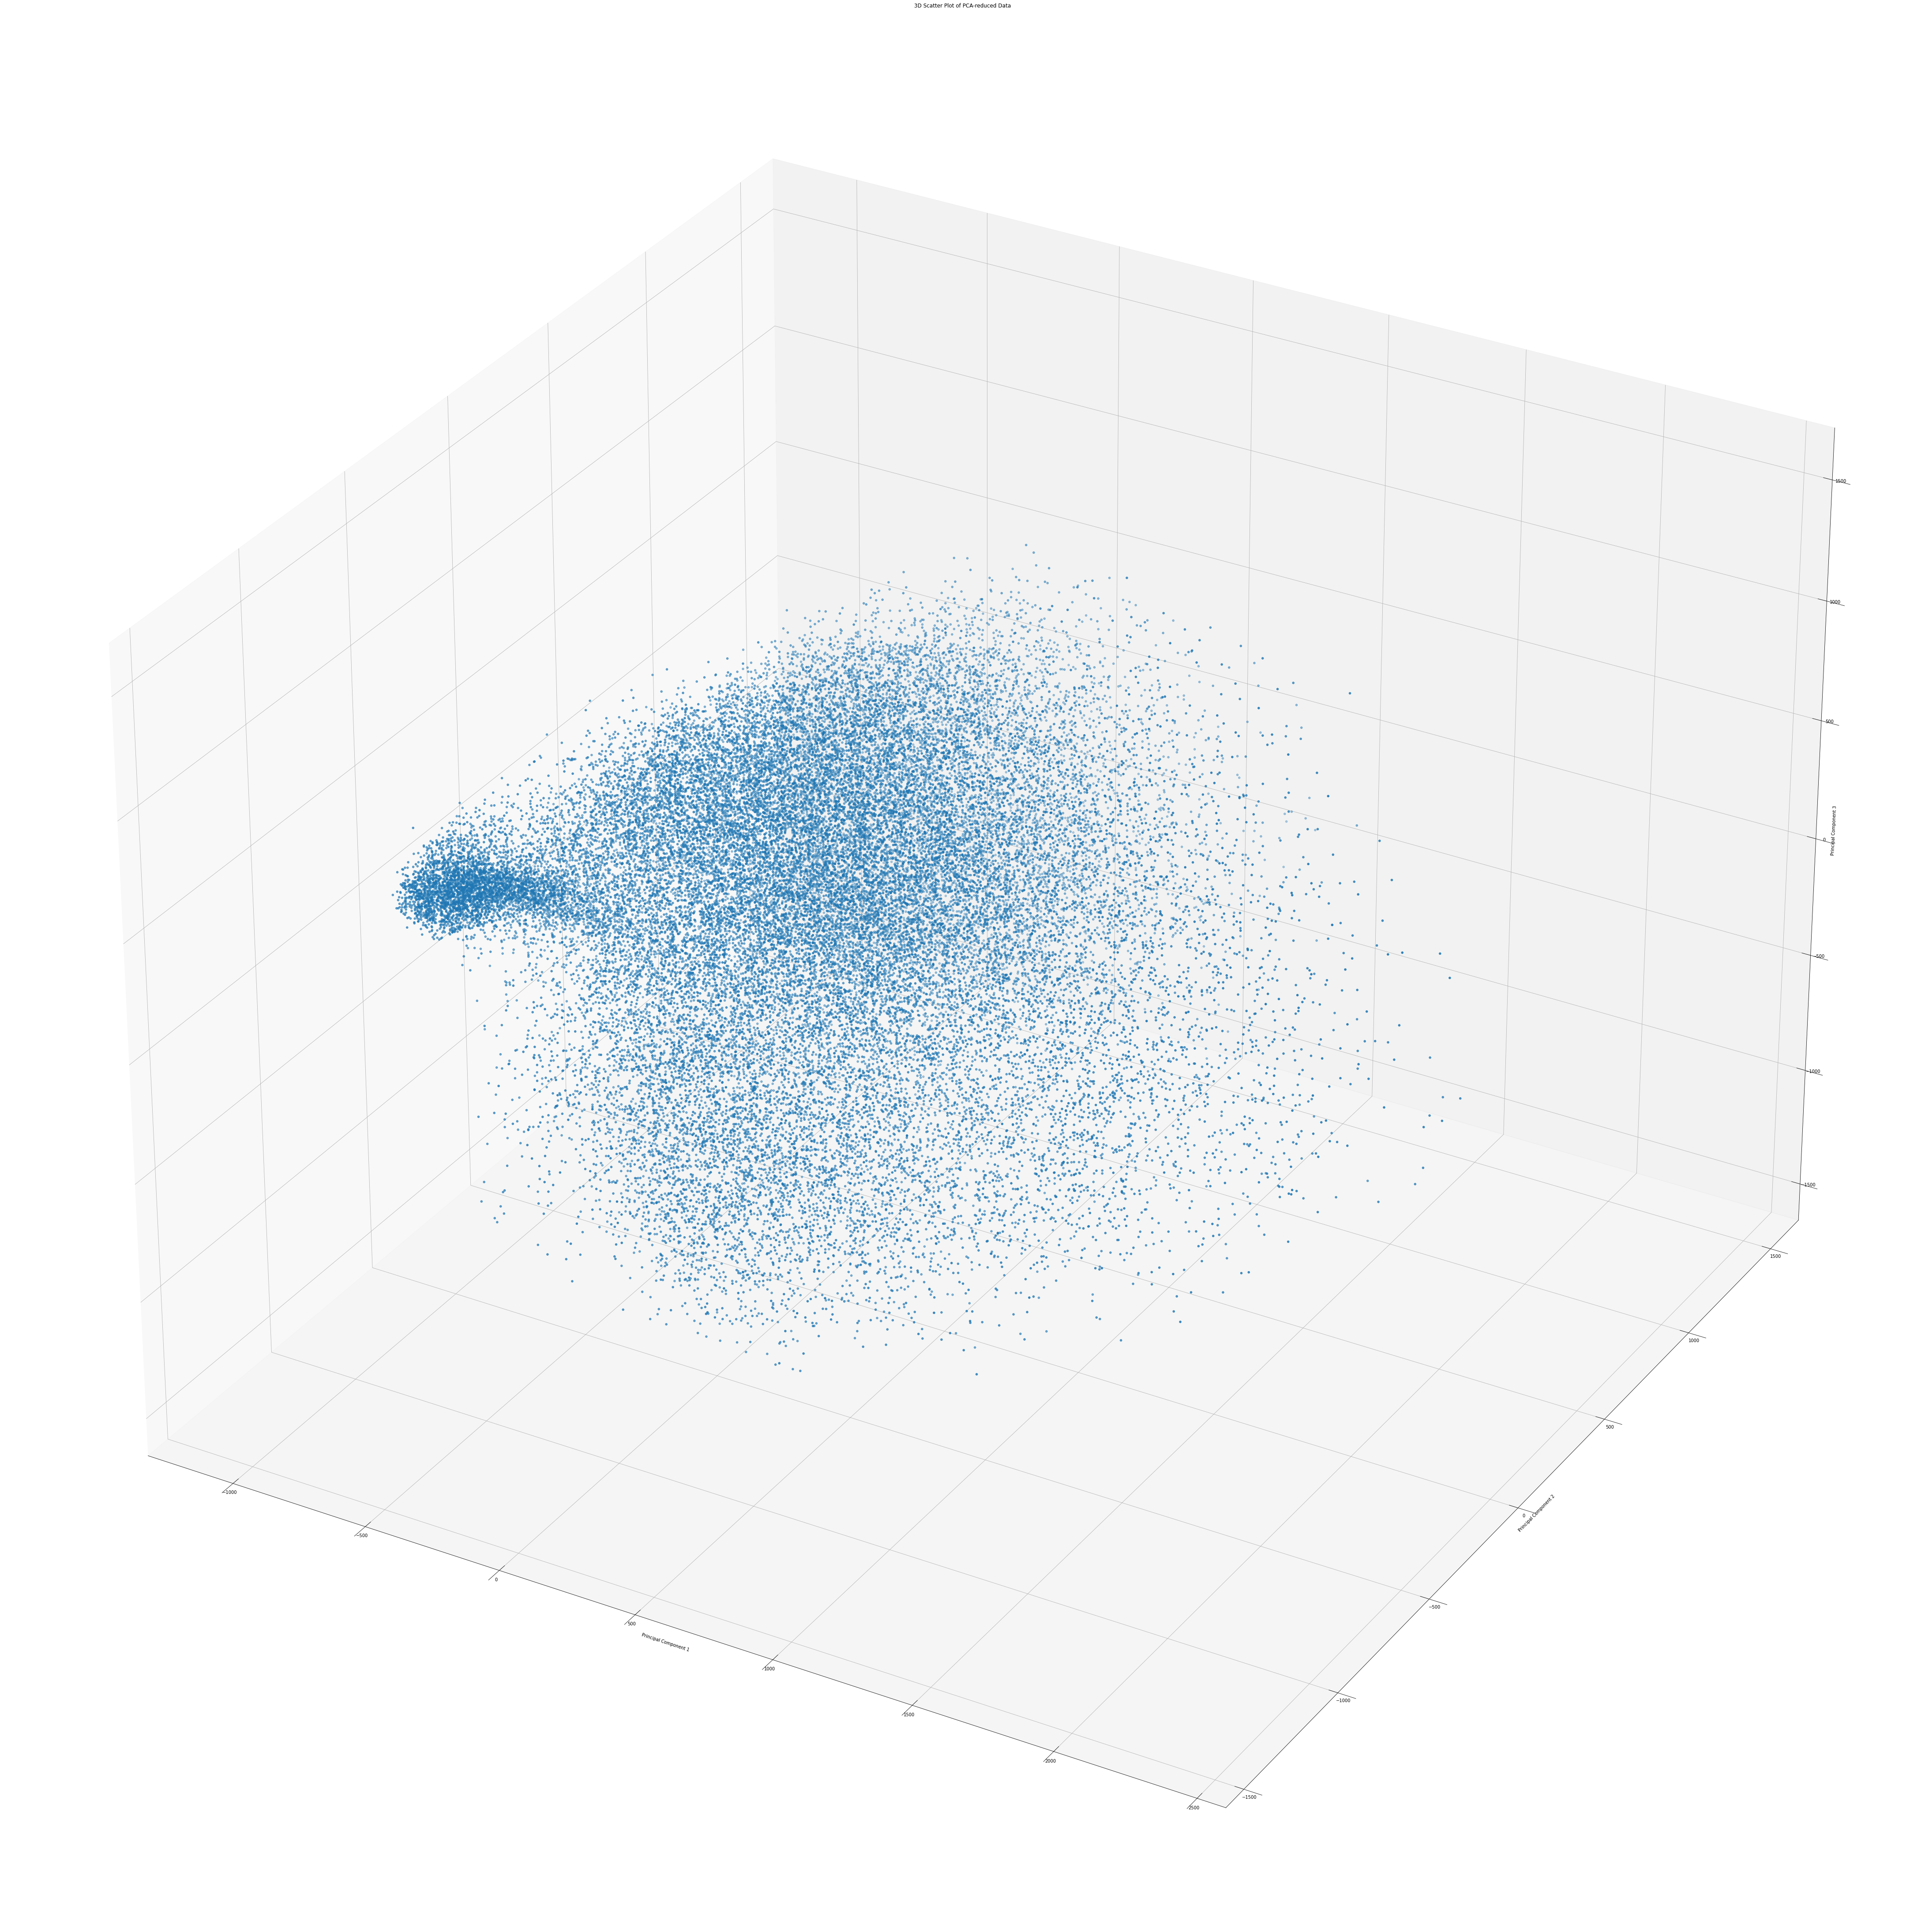

In [116]:
# part III
# because our data is so sparse we perform dimension reduction using autoencoders

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


df = pd.read_csv('unlabeled_train_set.csv')
X_Cluster =  df.values

from mpl_toolkits.mplot3d import Axes3D



# Apply PCA for plotting
pca = PCA(n_components=3)  
reduced_data = pca.fit_transform(X_Cluster)

# Create a 3D plot
fig = plt.figure(figsize=(100, 80))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of PCA-reduced Data')
plt.show()




In [153]:
#transform values to pytorch tensor
tensor_Xc = torch.tensor(X_Cluster).float()/255.0
X_Cluster = model.encoder(tensor_X)
Xc = X_Cluster.detach().numpy()

# We use k-means algorithm the reasons behind it are fully discussed in the report
# We have 10 classes so we want to have 10 clusters

kmeans = KMeans(n_clusters = 10, random_state=42)

# Train model
kmeans.fit(Xc)

cluster_labels = kmeans.labels_

from sklearn.metrics import silhouette_score, davies_bouldin_score

# We use below metrices to see how well our clustering performs
silhouette = silhouette_score(Xc, kmeans.labels_)
davies_bouldin = davies_bouldin_score(Xc, kmeans.labels_)

# The results are not so satisfying.
# as Silhouette Coefficient must be close to 1 and Davies-Bouldin Index close to zero for confirming a good clustering
print("Silhouette Coefficient:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)
# Print the cluster labels
print("Cluster Labels:")
print(cluster_labels)

<ipython-input-153-582998b0565b>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_Xc = torch.tensor(X_Cluster).float()/255.0


Silhouette Coefficient: 0.21937436
Davies-Bouldin Index: 1.4816132628270358
Cluster Labels:
[0 4 2 ... 3 5 1]


In [155]:
df1 = pd.DataFrame(X, columns=[f'feature{i+1}' for i in range(X.shape[1])])
df1['label'] = y


df2 = pd.DataFrame(Xc, columns=[f'feature{i+1}' for i in range(Xc.shape[1])])
df2['label'] = cluster_labels

# Concatenate df1 and df2 to create the final DataFrame
df_combined = pd.concat([df1, df2], ignore_index=True)


print("Combined DataFrame:")
print(df_combined)

Combined DataFrame:
       feature1  feature2  feature3  feature4  feature5  feature6   feature7  \
0      1.259944 -2.639353  3.114481  2.694905 -1.723311 -0.580258  -4.713061   
1     -1.218006  6.141042  1.487840 -7.509465 -2.920328 -1.267664 -12.082092   
2      4.017248  4.135043 -3.232166 -6.274142 -3.024076 -0.704658 -10.045803   
3     -2.500184  4.579970 -1.081939 -2.113316 -2.818019 -0.106358  -3.525923   
4     -1.882843  3.509491  0.776057  1.062144 -1.581802 -0.860998  -2.378468   
...         ...       ...       ...       ...       ...       ...        ...   
27995 -1.138639  0.192434  0.711946  1.823215 -9.286847  0.829416  -3.697356   
27996 -0.981575  5.336326 -2.523448 -0.564863 -3.470795 -1.227047  -1.964846   
27997  0.338770  2.760818  2.330715  3.385528  2.258427 -1.169246  -5.327196   
27998 -5.274797  0.697198  2.062363 -4.637794 -1.603919  3.562927 -10.430853   
27999  3.016011  2.018857  2.095581 -0.325471 -0.706758 -3.019192  -6.675386   

       feature8  fe

In [158]:
# Now we should train and test the mlp
best_mlp2 = MLPClassifier(hidden_layer_sizes = (100,), activation = 'relu'
                         , learning_rate = 'adaptive'
                         , max_iter=1000)

# Now it's time to train the best model on our training set and then test in on our test set

from sklearn.metrics import accuracy_score, confusion_matrix

X_train = df_combined.iloc[:, 1:].values
y_train = df_combined['label'].values

# We should change our test data to a 10-dimension data using our encoder
df = pd.read_csv('test_set.csv')

# Separate the features and labels
X_test1 = df.iloc[:, 1:].values
y_test = df['label'].values

# Transform values to pytorch tensor
tensor_X = torch.tensor(X_test1).float()/255.0
X_encoded_test = model.encoder(tensor_X)
X_test = X_encoded_test.detach().numpy()

best_mlp2.fit(X_train, y_train)

print('Training done')

y_pred = best_mlp2.predict(X_test)


accuracy3 = accuracy_score(y_test, y_pred)
confusion_mtx3 = confusion_matrix(y_test, y_pred)

print("For Test Data")
print("Accuracy : " , accuracy3)
print(confusion_mtx3)
print("For Train Data")
print(X_train.shape)
y_pred4 = best_mlp2.predict(X_train)
accuracy4 = accuracy_score(y_train, y_pred4)
confusion_mtx4 = confusion_matrix(y_train, y_pred4)
print("Accuracy : " , accuracy4)
print(confusion_mtx4)

Training done
For Test Data
Accuracy :  0.142
[[679 207  75   9   9   0   0   0   1   0]
 [402 680  20  33   0   0   0   0   0   0]
 [665 308  46   1  12   0   0   0   0   0]
 [731 222  45   8   3   0   1   0   0   0]
 [718  66 128  61   7   2   0   0   0   0]
 [757 101  30   4   0   0   0   0   0   0]
 [343 238 348  28   1   0   0   0   0   0]
 [153  99 475 234  67   0   0   0   0   0]
 [882  73  17   2   0   0   0   0   0   0]
 [177  60 546 207  14   5   0   0   0   0]]
For Train Data
(28000, 10)
Accuracy :  1.0
[[2684    0    0    0    0    0    0    0    0    0]
 [   0 3248    0    0    0    0    0    0    0    0]
 [   0    0 2747    0    0    0    0    0    0    0]
 [   0    0    0 3652    0    0    0    0    0    0]
 [   0    0    0    0 2209    0    0    0    0    0]
 [   0    0    0    0    0 2615    0    0    0    0]
 [   0    0    0    0    0    0 2448    0    0    0]
 [   0    0    0    0    0    0    0 3984    0    0]
 [   0    0    0    0    0    0    0    0 2250    0]
 [ 